# COMS 4995 AML Group Project 
   
  
## Topic: Airline Passenger Satisfaction  
  
  
**Group 2 Members:**  

**Anqi Xue, ax2170  
Tanisha Aggrawal, ta2709  
Vishal Bhardwaj, vb2573**

## The Dataset


### Description

This data set contains details of an airline passenger satisfaction survey and the target variable is a binary variable reflecting the airline satisfaction level (satisfied, neutral or dissatisfied) of a passenger.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV

%matplotlib inline

## Part 1: Data Preprocessing  

**1.1: Load the datasets**

In [4]:
dev_df = pd.read_csv('train_and_validation.csv', index_col = 0)
test_df = pd.read_csv('test.csv', index_col = 0)

In [5]:
dev_df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
test_df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


**1.2: Missing values analysis**

We remove the information about the passenger (the whole row) if part of their data is missing. 


In [7]:
# Checking null values in dev dataset
np.any(dev_df.isnull() == True)

True

In [8]:
#drop the whole row with null value(s) in dev set
dev_df = dev_df.dropna(axis = 0, how = 'any')
dev_df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


310 rows have been removed from the dev set, that is, 310 samples had at least one null value.

In [9]:
# Checking null values in test dataset
np.any(test_df.isnull() == True)

True

In [10]:
#drop the whole row with null value(s) in test set
test_df = test_df.dropna(axis = 0, how = 'any')
test_df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


83 rows have been removed from the test set, that is, 83 samples had at least one null value.

**1.3: Explain the distribution of the target variable and the dataset**

Text(0, 0.5, 'Distribution of target variable')

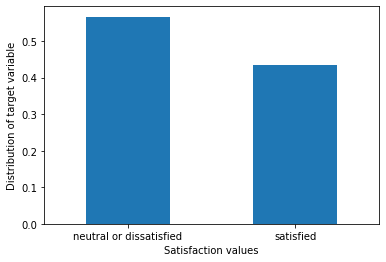

In [11]:
dev_df['satisfaction'].value_counts(normalize = True).plot(kind='bar', rot=0)
plt.xlabel('Satisfaction values')
plt.ylabel('Distribution of target variable')

**1.4: Drop the columns**  
We drop the id column because this information is irrelevant to the target output

In [12]:
X_dev = dev_df.drop(columns = ['id', 'satisfaction'])
X_test = test_df.drop(columns = ['id', 'satisfaction'])

In [18]:
y_dev = dev_df['satisfaction']
y_test = test_df['satisfaction']

**1.5: Exploratory Data Analysis** 

In [13]:
#Description of the columns in the Dataframe
X_dev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

In [14]:
#Segragating features into continuous-value features, numerical rating features, and categorical features
num_feats = list(X_dev.select_dtypes(['number']).columns)
continuous_feats = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
rating_feats = [feat for feat in num_feats if feat not in continuous_feats]
cat_feats = list(X_dev.select_dtypes(['object']).columns)

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                          30107      22469
Male                            28590      22428
satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                       44249      40413
disloyal Customer                    14448       4484
satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                    29831      41634
Personal Travel                    28866       3263
satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                        15143      34390
Eco                             37922       8671
Eco Plus                         5632       1836


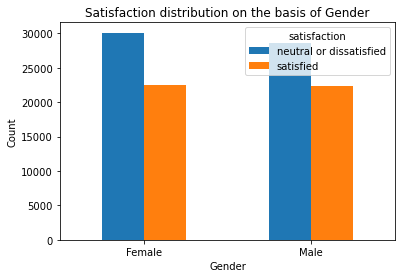

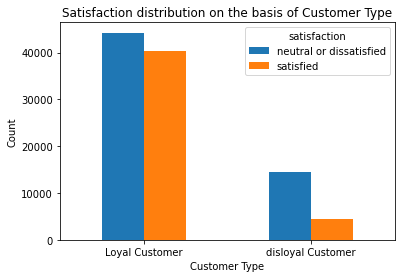

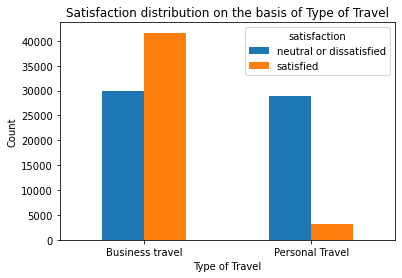

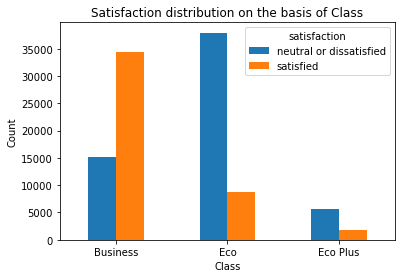

In [15]:
#Categorical Features Analysis
for feature in cat_feats:
  print(dev_df.groupby([feature, 'satisfaction']).size().unstack())
  dev_df.groupby([feature, 'satisfaction']).size().unstack().plot(kind='bar', rot=0)
  plt.ylabel('Count')
  plt.title('Satisfaction distribution on the basis of '+ feature)

* Consistent distribution of target variable in each category for the features Gender and Customer Type.
* Similar number of ‘Males’ and ‘Females’ in the Dev set.
* Almost 4.5 times more loyal customers than disloyal customers.
*Number of dissatisfied customers is similar for customers travelling for business and personal purposes.
* 58% customers travelling for business purposes are satisfied whereas only 10% of customers travelling for personal purposes are satisfied.
* Only 2940 more customers travelled in Business than Eco.
* 69.5% customers travelling in Business class were satisfied whereas only 18.6% customers travelling in Eco class were satisfied.
* Only 7.2% customers travelled in Eco Plus.

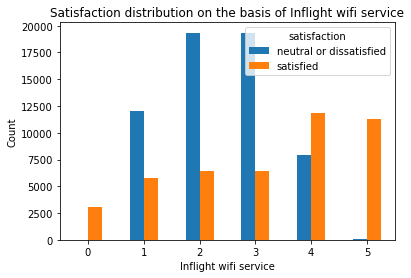

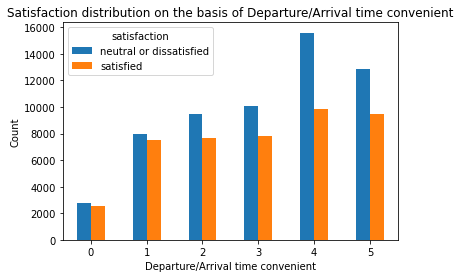

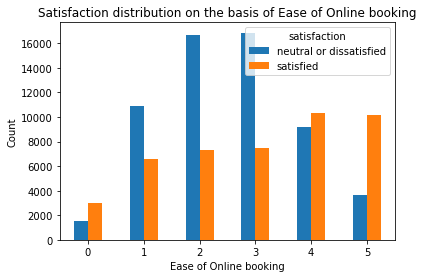

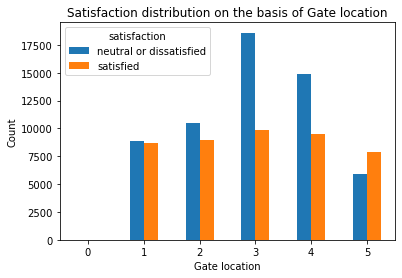

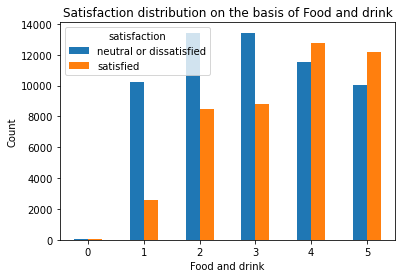

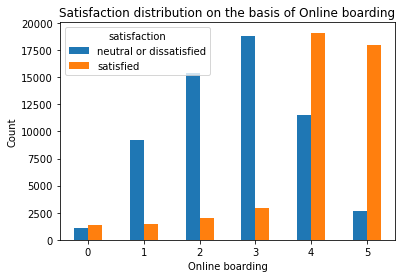

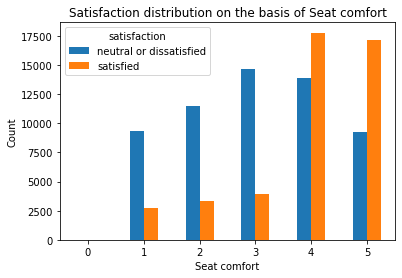

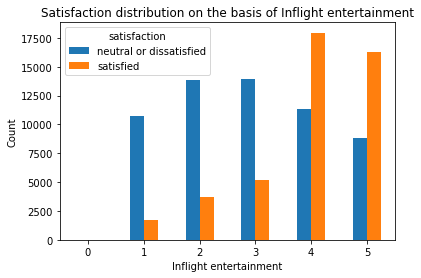

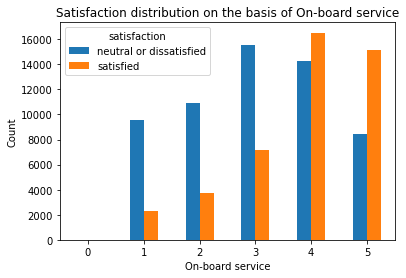

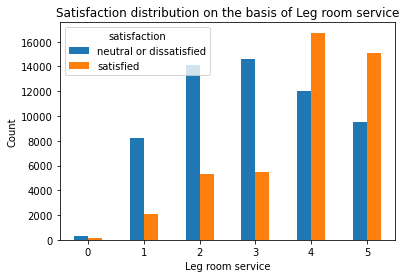

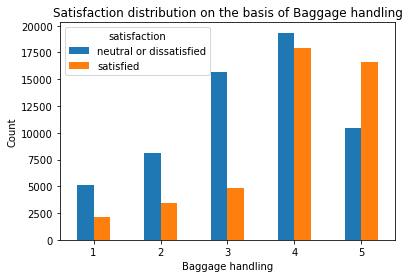

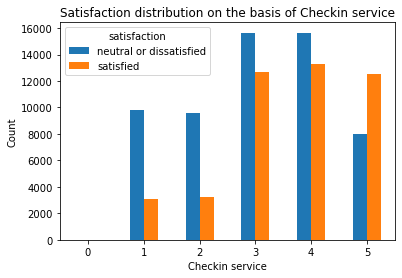

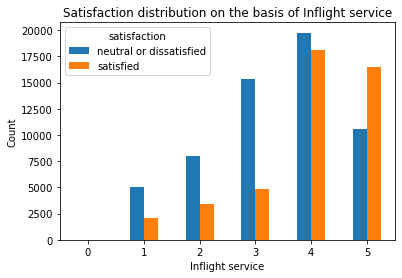

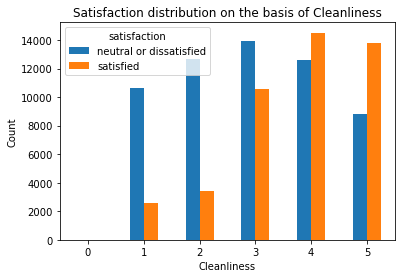

In [16]:
#Numerical Ratings based features Analysis
for feature in rating_feats:
  dev_df.groupby([feature, 'satisfaction']).size().unstack().plot(kind='bar', rot=0)
  plt.ylabel('Count')
  plt.title('Satisfaction distribution on the basis of '+ feature)

Text(0.5, 1.0, 'Satisfaction distribution on the basis of Age')

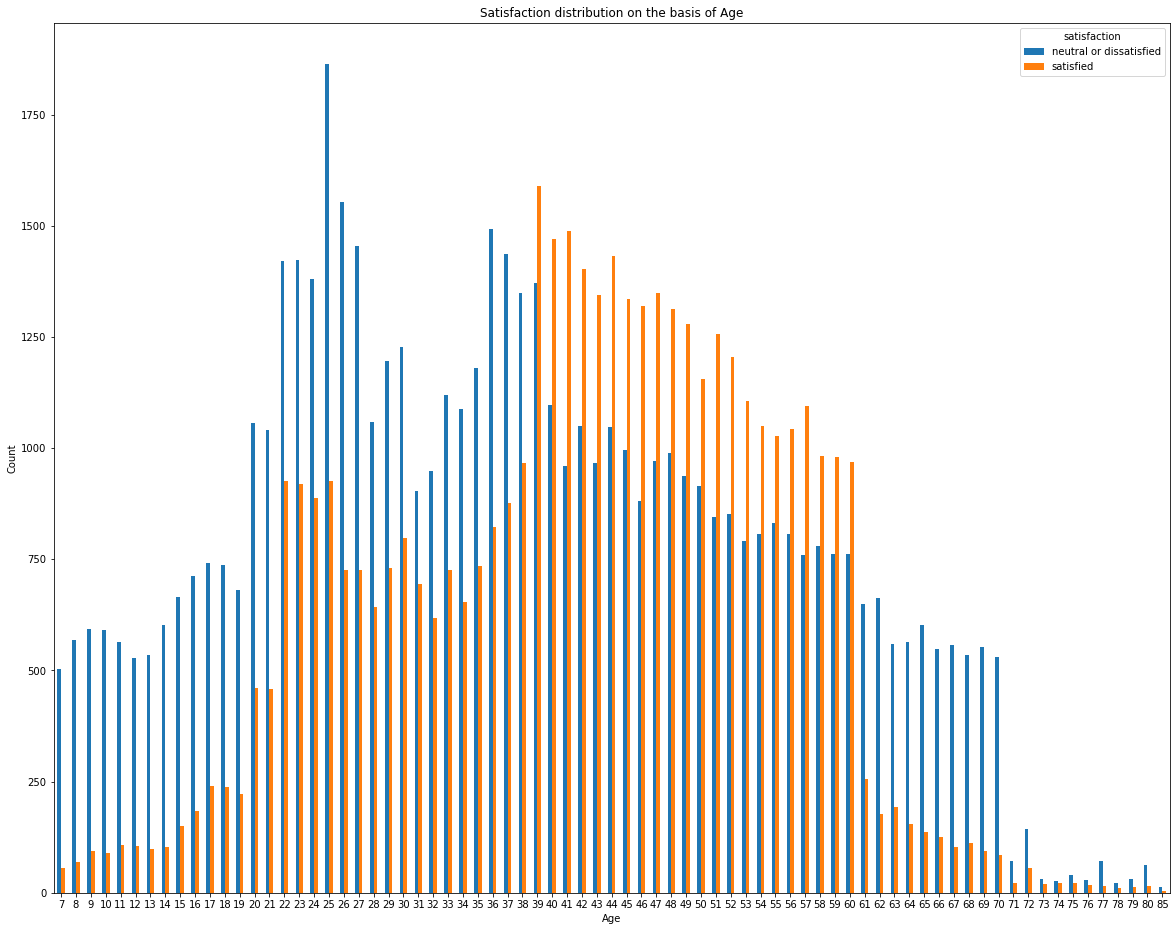

In [17]:
#Age vs Satisfaction Analysis
dev_df.groupby(['Age', 'satisfaction']).size().unstack().plot(kind='bar', rot=0, figsize=(20,16))
plt.ylabel('Count')
plt.title('Satisfaction distribution on the basis of Age')

In [19]:
dev_df[(dev_df['Age'] >= 39) & (dev_df['Age']<=60)]['satisfaction'].value_counts()

satisfied                  27197
neutral or dissatisfied    20182
Name: satisfaction, dtype: int64

In [20]:
dev_df[~(dev_df['Age'] >= 39) | ~(dev_df['Age']<=60)]['satisfaction'].value_counts()

neutral or dissatisfied    38515
satisfied                  17700
Name: satisfaction, dtype: int64

In [21]:
dev_df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test_df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

C:\Users\16207\AppData\Local\Temp\ipykernel_16284\2439646969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
C:\Users\16207\AppData\Local\Temp\ipykernel_16284\2439646969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)


In [22]:
X_dev['Flight Distance'].describe()

count    103594.000000
mean       1189.325202
std         997.297235
min          31.000000
25%         414.000000
50%         842.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

Text(0.5, 1.0, 'Satisfaction distribution on the basis of Flight Distacne')

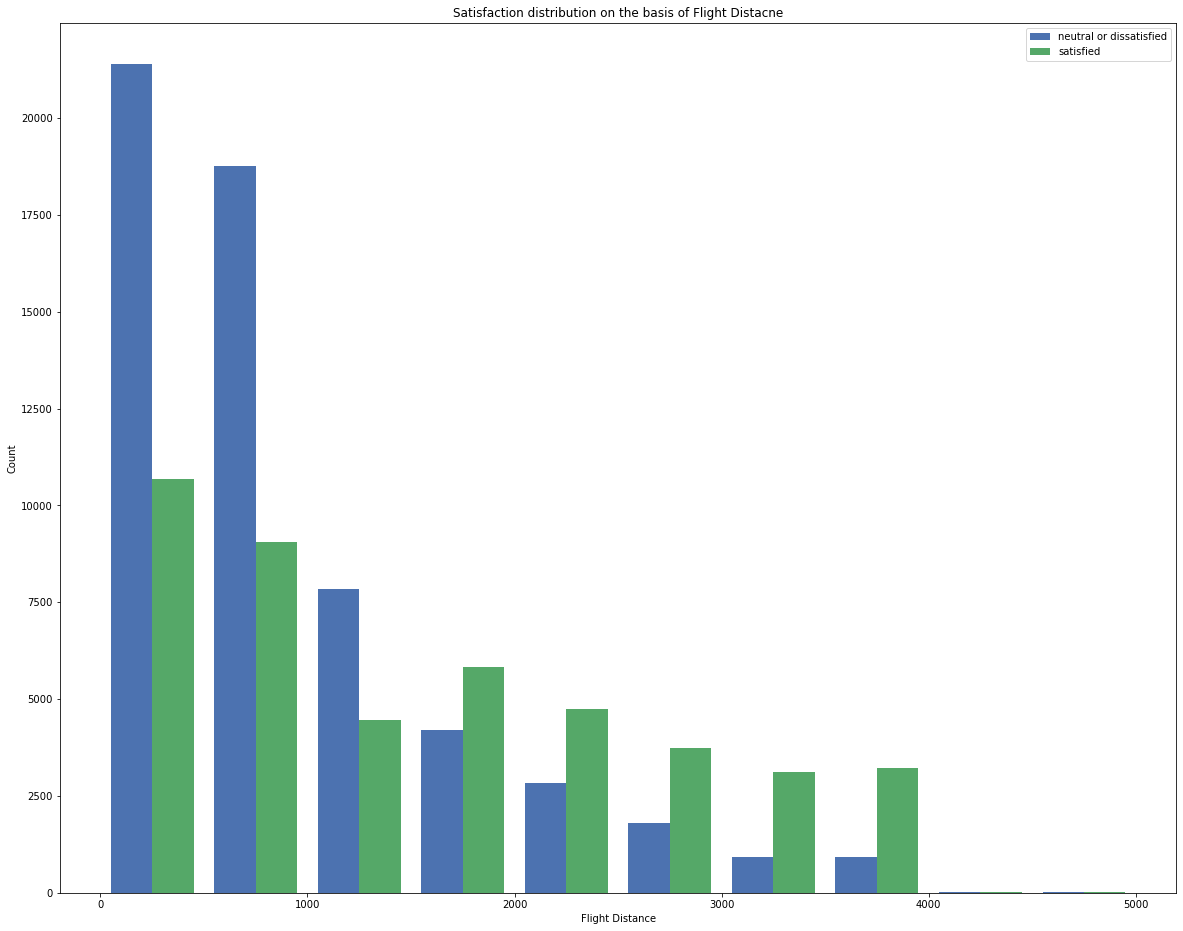

In [23]:
plt.style.use('seaborn-deep')
plt.figure(figsize=(20,16))
y0 = dev_df[dev_df['satisfaction'] == 0]['Flight Distance']
y1 = dev_df[dev_df['satisfaction'] == 1]['Flight Distance']
plt.hist([y0, y1], bins=np.linspace(0, 5000, 11))
plt.legend(['neutral or dissatisfied', 'satisfied'])
plt.xlabel('Flight Distance')
plt.ylabel('Count')
plt.title('Satisfaction distribution on the basis of Flight Distacne')

In [24]:
dev_df[(dev_df['Flight Distance'] <= 1500)]['satisfaction'].value_counts()

0    48008
1    24213
Name: satisfaction, dtype: int64

In [25]:
dev_df[(dev_df['Flight Distance'] > 1500)]['satisfaction'].value_counts()

1    20684
0    10689
Name: satisfaction, dtype: int64

In [26]:
dev_df[(dev_df['Flight Distance'] > 4000)]['satisfaction'].value_counts()

1    32
0    26
Name: satisfaction, dtype: int64

* 69.7% customers in the survey travelled less than 1500 miles.
* Two-thirds of the customers travelling less than 1500 miles were neutral or dissatisfied.
* Amongst customers who travelled more than 1500 miles, the number of satisfied customers is twice as many as dissatisfied customers.
* The number of customers who travelled more than 4000 miles is just 58, which is ~0.056% of the total sample size.

In [27]:
X_dev['Departure Delay in Minutes'].describe()

count    103594.000000
mean         14.747939
std          38.116737
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

Text(0.5, 1.0, 'Satisfaction distribution on the basis of Departure Delay')

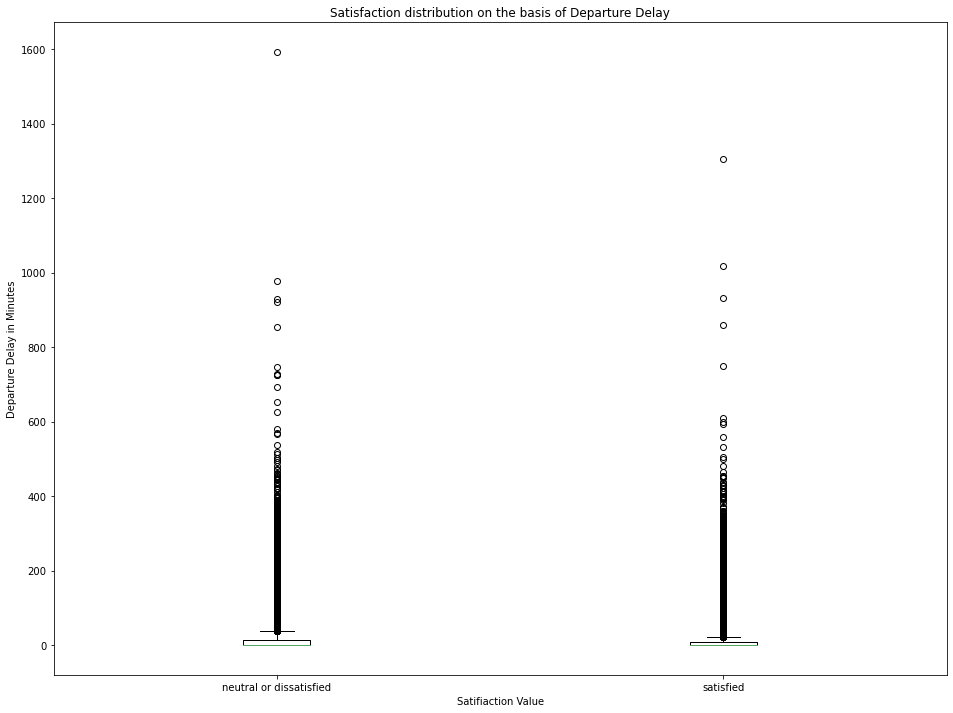

In [28]:
# plt.figure(figsize=(24,18))
y00 = dev_df[dev_df['satisfaction'] == 0]['Departure Delay in Minutes']
y01 = dev_df[dev_df['satisfaction'] == 1]['Departure Delay in Minutes']
plt.figure(figsize=(16,12))
plt.boxplot([y00, y01])
plt.xticks([1,2], ['neutral or dissatisfied', 'satisfied'])
plt.xlabel('Satifiaction Value')
plt.ylabel('Departure Delay in Minutes')
plt.title('Satisfaction distribution on the basis of Departure Delay')

In [29]:
X_dev['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

Text(0.5, 1.0, 'Satisfaction distribution on the basis of Arrival Delay')

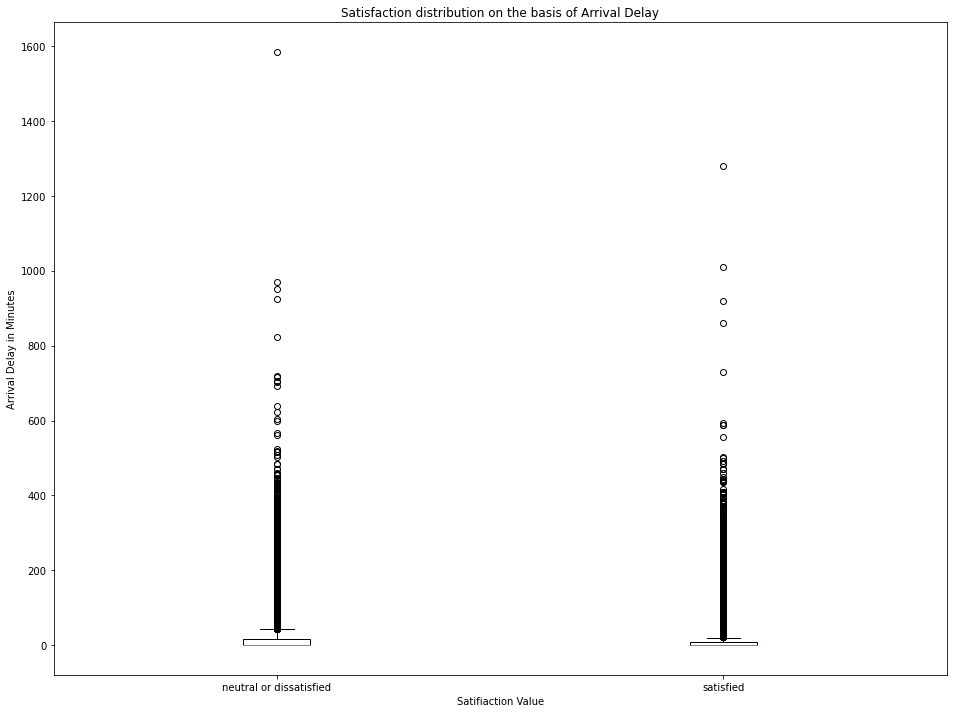

In [30]:
y10 = dev_df[dev_df['satisfaction'] == 0]['Arrival Delay in Minutes']
y11 = dev_df[dev_df['satisfaction'] == 1]['Arrival Delay in Minutes']
plt.figure(figsize=(16,12))
plt.boxplot([y10, y11])
plt.xticks([1,2], ['neutral or dissatisfied', 'satisfied'])
plt.xlabel('Satifiaction Value')
plt.ylabel('Arrival Delay in Minutes')
plt.title('Satisfaction distribution on the basis of Arrival Delay')

Text(0.5, 1.0, 'Departure Delay vs Arrival Delay for Neutral/Dissatisfied Customers')

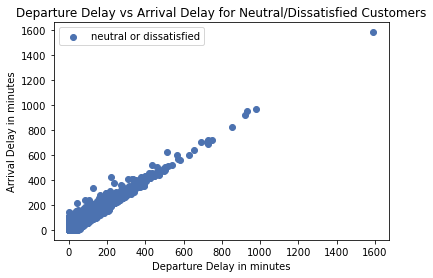

In [31]:
plt.scatter(y00, y10)
plt.legend(['neutral or dissatisfied'])
plt.ylabel('Arrival Delay in minutes')
plt.xlabel('Departure Delay in minutes')
plt.title('Departure Delay vs Arrival Delay for Neutral/Dissatisfied Customers')

Text(0.5, 1.0, 'Departure Delay vs Arrival Delay for Satisfied Customers')

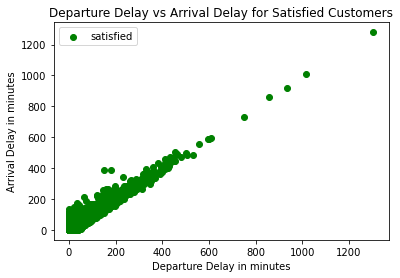

In [32]:
plt.scatter(y01, y11, color='green')
plt.legend(['satisfied'])
plt.ylabel('Arrival Delay in minutes')
plt.xlabel('Departure Delay in minutes')
plt.title('Departure Delay vs Arrival Delay for Satisfied Customers')

* Highly skewed
  * Departure delay: first quartile = 0.00 ; third quartile = 12.00
  * Arrival delay: first quartile = 0.00 ; third quartile = 13.00

**1.6: Preprocess the data (Handle the categorical variable and apply scaling)**

In [33]:
# Encoding Categorical features
for feature in cat_feats:
  string=feature+'_encoded'
  enc = OrdinalEncoder()
  X_dev[string] = enc.fit_transform(np.asarray(X_dev[feature]).reshape(-1,1))
  X_test[string] = enc.transform(np.asarray(X_test[feature]).reshape(-1,1))

In [34]:
#Replacing categorical features with encoded counterparts and plotting Correlation matrix 
X_dev = X_dev.drop(columns=cat_feats)
X_dev.corr().abs().style.background_gradient(cmap='coolwarm')

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_encoded,Customer Type_encoded,Type of Travel_encoded,Class_encoded
Age,1.000000,0.099838,0.017470,0.038038,0.024461,0.001558,0.022920,0.208681,0.160302,0.076380,0.057123,0.040498,0.047619,0.035003,0.049899,0.053493,0.010150,0.012147,0.008921,0.281821,0.048593,0.117423
Flight Distance,0.099838,1.000000,0.007050,0.019908,0.065697,0.004732,0.056957,0.215191,0.157517,0.128645,0.109540,0.133839,0.063222,0.073224,0.057430,0.093121,0.001906,0.002426,0.006079,0.225363,0.267642,0.427509
Inflight wifi service,0.017470,0.007050,1.000000,0.343758,0.715848,0.336127,0.134603,0.457002,0.122617,0.209513,0.121484,0.160485,0.121060,0.043178,0.110626,0.132652,0.017451,0.019095,0.008964,0.007706,0.104879,0.023046
Departure/Arrival time convenient,0.038038,0.019908,0.343758,1.000000,0.437021,0.444601,0.005189,0.069990,0.011416,0.004683,0.068604,0.012461,0.071901,0.093329,0.073227,0.014337,0.000791,0.000864,0.008846,0.207007,0.259829,0.089793
Ease of Online booking,0.024461,0.065697,0.715848,0.437021,1.000000,0.458746,0.031940,0.404093,0.030021,0.047185,0.038759,0.107431,0.038851,0.010957,0.035330,0.016192,0.006292,0.007984,0.007166,0.019627,0.133399,0.094323
Gate location,0.001558,0.004732,0.336127,0.444601,0.458746,1.000000,0.001170,0.001451,0.003383,0.003564,0.028532,0.005868,0.002421,0.035451,0.001742,0.004015,0.005533,0.005143,0.000213,0.006294,0.030802,0.004532
Food and drink,0.022920,0.056957,0.134603,0.005189,0.031940,0.001170,1.000000,0.234492,0.574561,0.622374,0.058999,0.032415,0.034811,0.087055,0.034077,0.657648,0.029983,0.032524,0.005707,0.059554,0.063124,0.076834
Online boarding,0.208681,0.215191,0.457002,0.069990,0.404093,0.001451,0.234492,1.000000,0.420067,0.285194,0.155345,0.123780,0.083299,0.204208,0.074390,0.331498,0.018515,0.021949,0.042151,0.189477,0.224620,0.296949
Seat comfort,0.160302,0.157517,0.122617,0.011416,0.030021,0.003383,0.574561,0.420067,1.000000,0.610614,0.132030,0.105447,0.074553,0.191545,0.069193,0.678478,0.027323,0.029900,0.026643,0.159722,0.123994,0.209955
Inflight entertainment,0.076380,0.128645,0.209513,0.004683,0.047185,0.003564,0.622374,0.285194,0.610614,1.000000,0.420352,0.299850,0.378361,0.120812,0.405247,0.691735,0.027691,0.030703,0.006071,0.110106,0.147978,0.178928


In [35]:
#Replacing categorical features with encoded counterparts in test set 
X_test = X_test.drop(columns=cat_feats)

In [36]:
#Dropping 'Departure Delay in Minutes' due to high correlation with 'Arrival Delay in Minutes'
X_dev = X_dev.drop(columns=['Departure Delay in Minutes'])
X_test = X_test.drop(columns=['Departure Delay in Minutes'])

In [37]:
#Scaling the values
scaler = StandardScaler()
X_dev_scaled = scaler.fit_transform(X_dev)
X_test_scaled = scaler.fit(X_test)